In [17]:
import pandas as pd
import glob

def merge_csv_files(input_files, output_file_name):

    # Merge multiple CSV files in a folder into a single CSV file

    df_list = []

    for filename in input_files:
        df = pd.read_csv(filename, index_col=None, header=0, encoding= 'raw_unicode_escape')
        df_list.append(df)

    #combined_df = pd.merge(df_list, how= 'inner', on= 'VAERS_ID')
    #combined_df.to_csv(output_file_name, index=False)
    print(df_list)
   
merge_csv_files(["2021VAERSVAX.csv","2021VAERSDATA.csv","2021VAERSSYMPTOMS.csv"], "2021VAERS_Merged.csv")

UnicodeDecodeError: 'rawunicodeescape' codec can't decode bytes in position 26351-26352: truncated \UXXXXXXXX escape

In [93]:
!pwd

/Users/matthew/Desktop


In [68]:
!cd vaers
!pwd

/Users/matthew/Desktop


In [65]:
!ls

40510347_ElectronicTranscript.pdf
Book1.pdf
CANIMAL
Circuits 1 Lab.pdf
Class_6-1.ipynb
Data-Projects
Data_Projects_HW2_Q2.pdf
Dexamethasone Conc. Curve.xlsx
Do Homework - Ch 4 part 2 HW.pdf
F22+4520+HW+6c+-+INDIVIDUAL+-+Heat+Integration+by+hand.pdf
Honor+Code+CHEN+4530+2023.pdf
Matthew Kim - Resume (1).pdf
Matthew Kim - Resume.pdf
Matthew_Kim_Homework_1.ipynb
Matthew_Kim_Homework_2.ipynb
Matthew_Kim_Homework_3.ipynb
Matthew_Kim_Homework_4.ipynb
TWLSLSCP.pdf
VAERS
bioseparations-science-and-engineering-2nbsped-0195391810-9780195391817.pdf
code
mAb_perfusion_ode_MatthewKim.m
output.txt
planets
s41563-019-0508-z.pdf
shell-lesson-data


In [70]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

df = pd.read_csv("vaers/2023VAERSSYMPTOMS.csv")

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# loop through document list
for i in df.SYMPTOM1:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [word_rooter(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=3, num_words=3))



[(0, '0.177*"administ" + 0.149*"product" + 0.093*"expir"'), (1, '0.136*"product" + 0.135*"19" + 0.135*"covid"'), (2, '0.060*"event" + 0.051*"advers" + 0.049*"test"')]


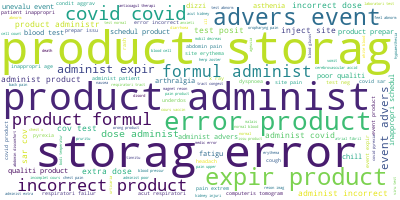

In [74]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

df = pd.read_csv("vaers/2023VAERSSYMPTOMS.csv")

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# loop through document list
for i in df.SYMPTOM1:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [word_rooter(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
# Import the wordcloud library
from wordcloud import WordCloud
import os
from os import path

# Converts arrray to txt file
with open("wordcloud.txt", "w") as txt_file:
    for line in texts:
        txt_file.write(" ".join(line) + "\n") # works with any number of elements in a line

#open text file in read mode
text_file = open("vaers/wordcloud.txt", "r")

#read whole file to a string
data = text_file.read()

#close file
text_file.close()        
        
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(data)
# Visualize the word cloud
wordcloud.to_image()


In [6]:
pip install nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

df = pd.read_csv("2022VAERSSYMPTOMS.csv")
df = df.astype(str)

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# loop through document list
for i in df.SYMPTOM1:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    letter_tokens = [re.sub('([0-9]+)', '', i) for i in stopped_tokens]
    
    # stem tokens
    stemmed_tokens = [word_rooter(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

for i in df.SYMPTOM2:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    letter_tokens = [re.sub('([0-9]+)', '', i) for i in stopped_tokens]
    
    # stem tokens
    stemmed_tokens = [word_rooter(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in df.SYMPTOM3:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    letter_tokens = [re.sub('([0-9]+)', '', i) for i in stopped_tokens]
    
    # stem tokens
    stemmed_tokens = [word_rooter(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in df.SYMPTOM4:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    letter_tokens = [re.sub('([0-9]+)', '', i) for i in stopped_tokens]
    
    # stem tokens
    stemmed_tokens = [word_rooter(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in df.SYMPTOM5:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    letter_tokens = [re.sub('([0-9]+)', '', i) for i in stopped_tokens]
    
    # stem tokens
    stemmed_tokens = [word_rooter(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=10)
print(ldamodel.print_topics(num_topics=3, num_words=3))


SyntaxError: invalid syntax (3443165871.py, line 1)

In [78]:
df = pd.read_csv("vaers/VAERSSYMPTOMS.csv")
print(df)

         VAERS_ID                      SYMPTOM1  SYMPTOMVERSION1  \
0          910642                      Dyspnoea             25.0   
1          916600                     Dysphagia             23.1   
2          916601                       Anxiety             23.1   
3          916602              Chest discomfort             23.1   
4          916603                     Dizziness             23.1   
...           ...                           ...              ...   
1346898   2583346                 Blepharospasm             25.1   
1346899   2583346      Laboratory test abnormal             25.1   
1346900   2583348           Injection site pain             25.1   
1346901   2583349  Injection site hypoaesthesia             25.1   
1346902   2583350                    Arthralgia             25.1   

                                  SYMPTOM2  SYMPTOMVERSION2  \
0                     Heart rate increased             25.0   
1                             Epiglottitis             23